In [1]:
import cv2
import numpy as np
from sympy import Matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
img1_path = "./data/MOT17/train/MOT17-04-FRCNN/img1/000134.jpg"
img2_path = "./data/MOT17/train/MOT17-04-FRCNN/img1/000135.jpg"

img1 = cv2.imread(img1_path)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread(img2_path)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

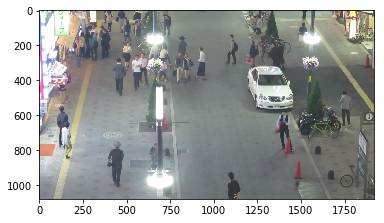

In [7]:
plt.imshow(img1)

In [8]:
orb = cv2.ORB_create()
kpt1, des1 = orb.detectAndCompute(img1, None)
kpt2, des2 = orb.detectAndCompute(img2, None)

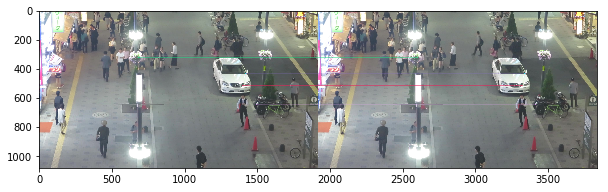

In [9]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv2.drawMatches(img1, kpt1, img2, kpt2, matches[:10], None, flags=2)
plt.figure(figsize=(10, 5)); plt.imshow(img3)

In [10]:
src_pts = np.float32([ kpt1[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
dst_pts = np.float32([ kpt2[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)

In [7]:
fundMat = cv2.findFundamentalMat(src_pts, dst_pts, method=cv2.FM_RANSAC)
F = fundMat[0]
F

array([[ 1.06324019e-05,  5.15604329e-03, -1.37186977e+00],
       [-5.16478723e-03, -2.94038505e-05,  5.36034099e+00],
       [ 1.36104506e+00, -5.34807022e+00,  1.00000000e+00]])

In [11]:
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
M

array([[ 9.99640260e-01,  1.46691027e-03, -1.71704047e-01],
       [-2.61500129e-05,  9.99805913e-01,  1.38570088e-01],
       [-3.13147123e-07,  9.63999229e-07,  1.00000000e+00]])

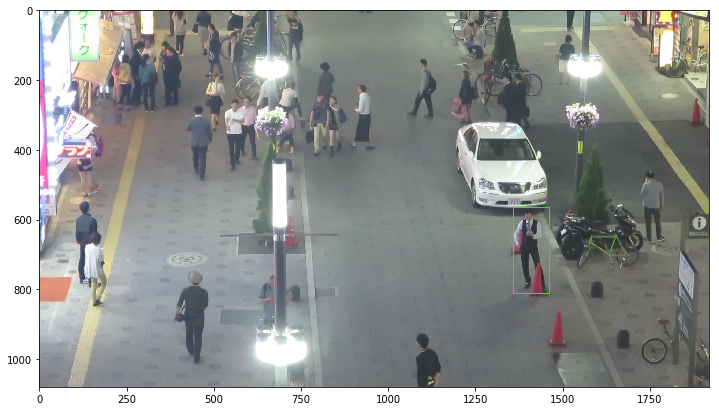

In [12]:
tlwh_float = [1359.1,566.1,104.7,246.6]
tlwh = [int(num) for num in tlwh_float]
cv2.rectangle(img2,(tlwh[0], tlwh[1]), (tlwh[0]+tlwh[2], tlwh[1]+tlwh[3]), (0,255,0), 2)
plt.figure(figsize=(12, 8))
plt.imshow(img2)

In [13]:
tlwh = [1326.4,185,54.7,177.7]
x1t1 = np.asarray([[tlwh[0]], [tlwh[1]]])
x2t1 = np.asarray([[tlwh[0]+tlwh[2]], [tlwh[1]]])
x3t1 = np.asarray([[tlwh[0]+tlwh[2]], [tlwh[1]+tlwh[3]]])
x4t1 = np.asarray([[tlwh[0]], [tlwh[1]+tlwh[3]]])
pts = np.array([x1t1, x2t1, x3t1, x4t1])
pts.shape

(4, 2, 1)

In [18]:
x1t1 = np.asarray([[tlwh[0]], [tlwh[1]], [1]])
x2t1 = np.asarray([[tlwh[0]+tlwh[2]], [tlwh[1]], [1]])
x3t1 = np.asarray([[tlwh[0]+tlwh[2]], [tlwh[1]+tlwh[3]], [1]])
x4t1 = np.asarray([[tlwh[0]], [tlwh[1]+tlwh[3]], [1]])
pts = np.array([x1t1, x2t1, x3t1, x4t1])
pts.shape

(4, 3, 1)

In [23]:
list(np.asarray([pts[0][0], pts[0][1], pts[1][0]-pts[0][1], pts[2][1]-pts[0][1]]).flatten())

[1326.4, 185.0, 1196.1000000000001, 177.7]

In [14]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r, c, _ = img1.shape
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        #img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        #img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1, img2

In [14]:
pts.shape

(4, 2, 1)

In [16]:
M

array([[ 9.95054454e-01, -2.78862834e-02,  7.69313548e+00],
       [ 7.33662959e-04,  9.91221106e-01,  1.95412224e-01],
       [-6.44883168e-07, -2.30929381e-05,  1.00000000e+00]])

In [16]:
pts_ex = np.asarray([[tlwh[0]], [tlwh[1]], [1]])
pts_ex.shape

(3, 1)

In [17]:
np.dot(pts_ex.T, M)

array([[1325.91800238,  186.90980456, -201.11278218]])

In [15]:
dst = cv2.perspectiveTransform(pts, M)
dst

error: OpenCV(4.0.0) /io/opencv/modules/core/src/matmul.cpp:2270: error: (-215:Assertion failed) scn + 1 == m.cols in function 'perspectiveTransform'


In [ ]:
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines = cv2.computeCorrespondEpilines(pts, 1, F)
lines = lines.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines,dst_pts,pts)
plt.figure(figsize=(12, 8))
plt.imshow(img3)

In [ ]:
%%time
orb = cv2.ORB_create()
kpt1, des1 = orb.detectAndCompute(img1, None)
kpt2, des2 = orb.detectAndCompute(img2, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)
src_pts = np.float32([ kpt1[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
dst_pts = np.float32([ kpt2[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)
fundMat = cv2.findFundamentalMat(src_pts, dst_pts, method=cv2.FM_RANSAC)

In [24]:
%%time
orb = cv2.ORB_create()
kpt1, des1 = orb.detectAndCompute(img1, None)
kpt2, des2 = orb.detectAndCompute(img2, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)
src_pts = np.float32([ kpt1[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
dst_pts = np.float32([ kpt2[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
M

CPU times: user 145 ms, sys: 0 ns, total: 145 ms
Wall time: 77.8 ms


In [95]:
def tlwh_to_homogeneous(tlwh):
    t, l, w, h = tlwh
    tl = np.asarray([[t], [l], [1]])
    tr = np.asarray([[t+w], [l], [1]])
    br = np.asarray([[t+w], [l+h], [1]])
    bl = np.asarray([[t], [l+h], [1]])
    return np.array([tl, tr, br, bl])

def homogeneous_to_tlwh(hm_tlwh):
    return list(np.asarray([hm_tlwh[0][0],
                            hm_tlwh[0][1],
                            hm_tlwh[1][0] - hm_tlwh[0][0],
                            hm_tlwh[2][1] - hm_tlwh[0][1]]).flatten())

def predict_homography(tlwh, img, prev_img):
    M = Homography(img, prev_img)
    pts = tlwh_to_homogeneous(tlwh)
    hm_tlwh = np.zeros(pts.shape)
    for idx, pt in enumerate(pts):
        cur_coord = np.dot(pt.T, M)
        hm_tlwh[idx] = cur_coord.T
    pred_tlwh = homogeneous_to_tlwh(hm_tlwh)
    return pred_tlwh

def Homography(img, prev_img):
    orb = cv2.ORB_create()
    kpt1, des1 = orb.detectAndCompute(prev_img, None)
    kpt2, des2 = orb.detectAndCompute(img, None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)

    src_pts = np.float32([kpt1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kpt2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    return M

In [99]:
%%time
tlwh = [1326.4,185,54.7,177.7]
pred_tlwh = predict_homography(tlwh, img2, img1)
pred_tlwh

CPU times: user 121 ms, sys: 0 ns, total: 121 ms
Wall time: 61.8 ms


In [50]:
pred_tlwh

[1325.9322391140274,
 186.91031472409017,
 54.680907074330435,
 177.74738560565706]